In [1]:
import numpy as np
import matplotlib.pyplot as plt

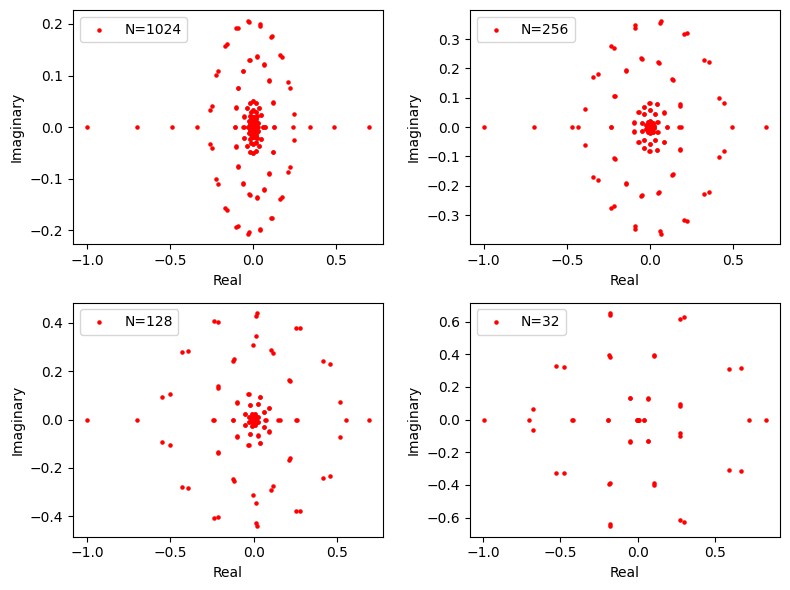

In [22]:
from cmath import exp, pi, sin as exp, pi, sin
from scipy.special import jv
import cmath

def eval_approx(N, K, delta, v):
    A = np.zeros((2*N+1, 2*N+1),dtype='complex')
    for i in np.arange(-N,N+1,1):
        for j in np.arange(-N,N+1,1):
            if j == 0:
                A[i+N,j+N] = delta*cmath.exp(2*cmath.pi*(0+1j)*j*v)*jv(j-i, j*K)
            else:
                A[i+N,j+N] = cmath.sin(cmath.pi*delta*j)/(delta*cmath.pi*j)*cmath.exp(2*cmath.pi*(0+1j)*j*v)*jv(j-i, j*K)
    w, v = np.linalg.eig(A)
    return w, v, A

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

delta = 0.01
N = 1024
K = 1
v = 1/2
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

axs[0, 0].scatter(re, im, s=5, c='red', label='N=1024')
axs[0, 0].set_xlabel('Real')
axs[0, 0].set_ylabel('Imaginary')
axs[0, 0].legend()

delta = 0.01
N = 256
K = 1
v = 1/2
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

# plot the complex numbers
axs[0, 1].scatter(re, im, s=5, c='red', label='N=256')
axs[0, 1].set_xlabel('Real')
axs[0, 1].set_ylabel('Imaginary')
axs[0, 1].legend()

delta = 0.01
N = 128
K = 1
v = 1/2
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

# plot the complex numbers
axs[1, 0].scatter(re, im, s=5, c='red', label='N=128')
axs[1, 0].set_xlabel('Real')
axs[1, 0].set_ylabel('Imaginary')
axs[1, 0].legend()


delta = 0.01
N = 32
K = 1
v = 1/2
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

# plot the complex numbers
axs[1, 1].scatter(re, im, s=5, c='red', label='N=32')
axs[1, 1].set_xlabel('Real')
axs[1, 1].set_ylabel('Imaginary')
axs[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

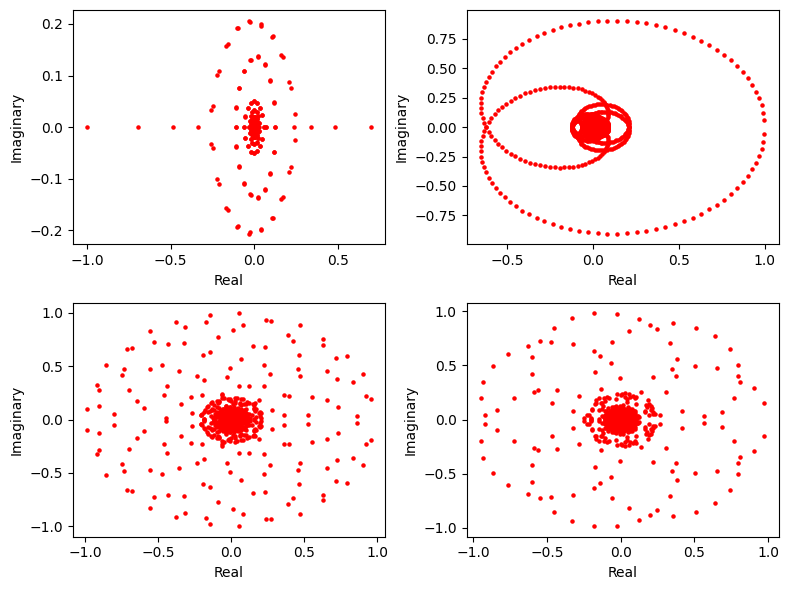

In [26]:
from cmath import exp, pi, sin as exp, pi, sin
from scipy.special import jv
import cmath

def eval_approx(N, K, delta, v):
    A = np.zeros((2*N+1, 2*N+1),dtype='complex')
    for i in np.arange(-N,N+1,1):
        for j in np.arange(-N,N+1,1):
            if j == 0:
                A[i+N,j+N] = delta*cmath.exp(2*cmath.pi*(0+1j)*j*v)*jv(j-i, j*K)
            else:
                A[i+N,j+N] = cmath.sin(cmath.pi*delta*j)/(delta*cmath.pi*j)*cmath.exp(2*cmath.pi*(0+1j)*j*v)*jv(j-i, j*K)
    w, v = np.linalg.eig(A)
    return w, v, A

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

delta = 0.01
N = 1024
K = 1
v = 1/2
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

axs[0, 0].scatter(re, im, s=5, c='red', label='N=1024')
axs[0, 0].set_xlabel('Real')
axs[0, 0].set_ylabel('Imaginary')
# axs[0, 0].legend()

delta = 0.01
N = 1024
K = 0
v = np.pi/320
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

# plot the complex numbers
axs[0, 1].scatter(re, im, s=5, c='red', label='N=256')
axs[0, 1].set_xlabel('Real')
axs[0, 1].set_ylabel('Imaginary')
# axs[0, 1].legend()

delta = 0.01
N = 1024
K = np.pi-3
v = np.sqrt(2)-1
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

# plot the complex numbers
axs[1, 0].scatter(re, im, s=5, c='red', label='N=128')
axs[1, 0].set_xlabel('Real')
axs[1, 0].set_ylabel('Imaginary')
# axs[1, 0].legend()


delta = 0.01
N = 1024
K = 1/2
v = 1/(2*np.pi)
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

# plot the complex numbers
axs[1, 1].scatter(re, im, s=5, c='red', label='N=32')
axs[1, 1].set_xlabel('Real')
axs[1, 1].set_ylabel('Imaginary')
# axs[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()